# Exercise 8 - Cats, Cats, Cats

In [1]:
from skimage import io
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import glob
from sklearn.decomposition import PCA
from skimage.transform import SimilarityTransform
from skimage.transform import warp
import os
import pathlib

from auxiliaryFuns import *

**Exercise 1:** *Preprocess all image in the training set. To do the preprocessing, you can use the code snippets supplied*

In [2]:
raw_dir = "data/training_data/"
preprocess_dir = "data/processed_training_cats_100"

if not os.path.exists(preprocess_dir):
    os.makedirs(preprocess_dir)
    preprocess_all_cats(raw_dir, preprocess_dir)

## Gathering data into a data matrix


**Exercise 2:** *Compute the data matrix.* 


In [3]:
files = glob.glob(f"{preprocess_dir}/*.jpg")

height, width, channels = io.imread(files[0]).shape
data_matrix = np.zeros((len(files), height * width * channels))
for i, f in enumerate(files):
    data_matrix[i, :] = io.imread(f).flatten()


## Compute and visualize a mean cat



**Exercise 3:** *Compute the average cat.*

In [4]:
average_cat = np.mean(data_matrix, axis=0)


**Exercise 4:** *Visualize the Mean Cat* 


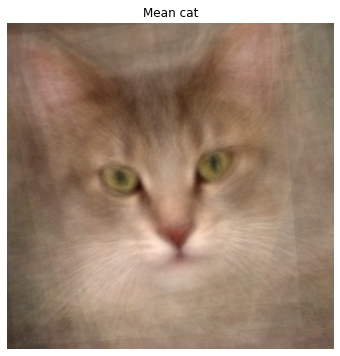

In [5]:
average_cat_img = create_u_byte_image_from_vector(average_cat, height, width, channels)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.imshow(average_cat_img)
ax.set_title("Mean cat")
ax.set_axis_off()
plt.show()


## Find a missing cat or a cat that looks like it (using image comparison)

**Exercise 5:** *Decide that you quickly buy a new cat that looks very much like the missing cat - so nobody notices* 


In [6]:
# :)

**Exercise 6:** Use the preprocess_one_cat function to preprocess the photo of the poor missing cat


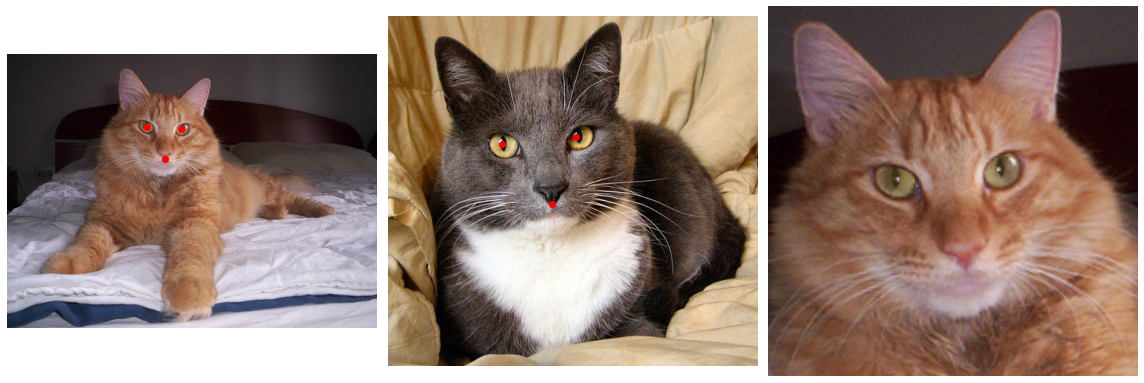

In [7]:
preprocess_one_cat()
# First image is the missing cat, second one the model cat 
# and the third one is the missing cat aligned and cropped
# Now there is a new file data/MissingCatProcessed.jpg

**Exercise 7:** *Flatten the pixel values of the missing cat so it becomes a vector of values.*


In [8]:
im_miss = io.imread("data/MissingCatProcessed.jpg")
im_miss_flat = im_miss.flatten()

**Exercise 8:** *Subtract you missing cat data from all the rows in the data_matrix and for each row compute the sum of squared differences. This can for example be done by:*

In [9]:
sub_data = data_matrix - im_miss_flat
sub_distances = np.linalg.norm(sub_data, axis=1)

**Exercise 9:** *Find the training cat that looks most like your missing cat by finding the cat, where the SSD is smallest. You can for example use `np.argmin`.*

In [10]:
min_idx = np.argmin(sub_distances)


**Exercise 10:** *Extract the found cat from the data_matrix and use `create_u_byte_image_from_vector` to create an image that can be visualized. Did you find a good replacement cat?*


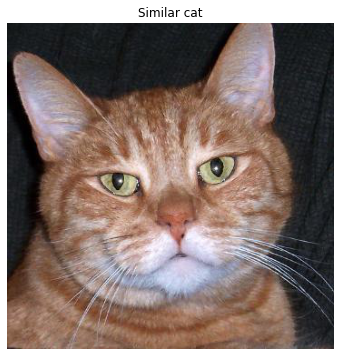

In [11]:
similar_cat = create_u_byte_image_from_vector(data_matrix[min_idx, :], height, width, channels)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.imshow(similar_cat)
ax.set_title("Similar cat")
ax.set_axis_off()
plt.show()


**Exercise 11:** *You can use `np.argmax` to find the cat that looks the least like the missing cat.*

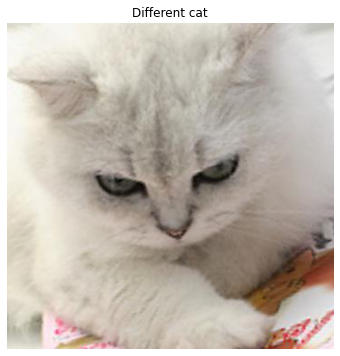

In [12]:
max_idx = np.argmax(sub_distances)
different_cat = create_u_byte_image_from_vector(data_matrix[max_idx, :], height, width, channels)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.imshow(different_cat)
ax.set_title("Different cat")
ax.set_axis_off()
plt.show()

## Principal component analysis on the cats 

**Exercise 12:** *Start by computing the first 50 principal components:*

In [13]:
print("Computing PCA")
cats_pca = PCA(n_components=50)
cats_pca.fit(data_matrix)

Computing PCA


PCA(n_components=50)

**Exercise 13:** *Plot the amount of the total variation explained by each component as function of the component number.*

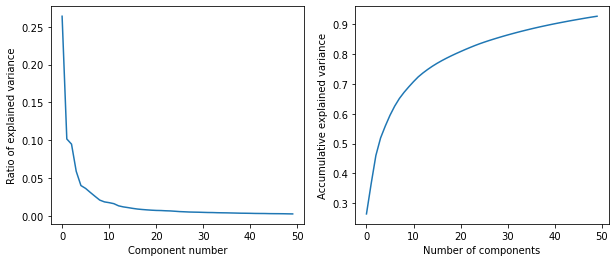

In [14]:
explained_variance = cats_pca.explained_variance_ratio_
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(explained_variance)
ax[0].set_ylabel("Ratio of explained variance")
ax[0].set_xlabel("Component number")
ax[1].plot(explained_variance.cumsum())
ax[1].set_ylabel("Accumulative explained variance")
ax[1].set_xlabel("Number of components")
plt.show()

**Exercise 14:** *How much of the total variation is explained by the first component?*

In [15]:
print("The first component explains {:.2f}% of the variance".format(explained_variance[0] * 100))

The first component explains 26.38% of the variance


**Exercise 15:** *Project the cat images into PCA space*:

In [16]:
components = cats_pca.transform(data_matrix)

**Exercise 16:** *Plot the PCA space by plotting all the cats first and second PCA coordinates in a (x, y) plot*

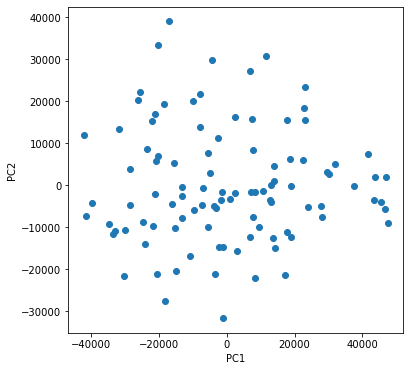

In [17]:
pc_1 = components[:, 0] 
pc_2 = components[:, 1]
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(pc_1, pc_2, "o")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

## Cats in space


### Extreme cats

**Exercise 17:** *Use `np.argmin` and `np.argmax` to find the ids of the cats that have extreme values in the first and second PCA coordinates. Extract the cats data from the data matrix and use `create_u_byte_image_from_vector` to visualize these cats. Also plot the PCA space where you plot the extreme cats with another marker and color.*

In [18]:
def nargmax(arr, n):
    # Like np.argmax but returns the n largest values
    idx = np.argpartition(arr, -n)[-n:]
    return idx[np.argsort(arr[idx])][::-1]

def nargmin(arr, n):
    # Like np.argmin but returns the n smallest values
    idx = np.argpartition(arr, n)[:n]
    return idx[np.argsort(arr[idx])]

def plot_pca_space_and_img(pc_idx):
    _, ax = plt.subplots(1, 2, figsize=(6, 3))
    ax[0].plot(pc_1, pc_2, "o")
    ax[0].plot(pc_1[pc_idx], pc_2[pc_idx], "ro", markersize=10)
    ax[0].set_xlabel("PC1")
    ax[0].set_ylabel("PC2")
    
    img = create_u_byte_image_from_vector(data_matrix[pc_idx, :], height, width, channels)
    ax[1].imshow(img)
    ax[1].set_title("Cat")
    ax[1].set_axis_off()
    plt.show()

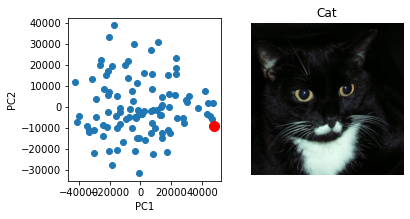

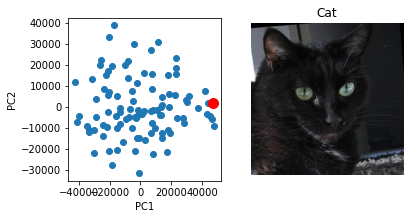

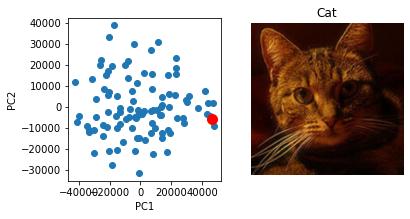

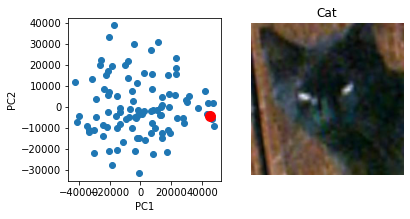

In [19]:
# Check the 4 largest values of PC1
max_pc1s = nargmax(pc_1, 4)
for i in max_pc1s:
    plot_pca_space_and_img(i)

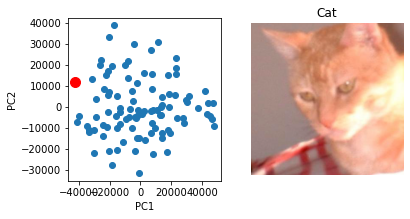

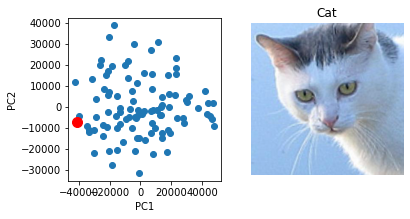

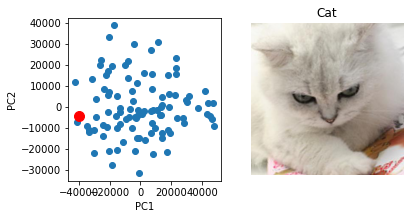

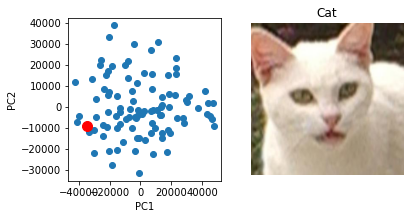

In [20]:
# Check the 4 smallest values of PC1
min_pc1s = nargmin(pc_1, 4)
for i in min_pc1s:
    plot_pca_space_and_img(i)

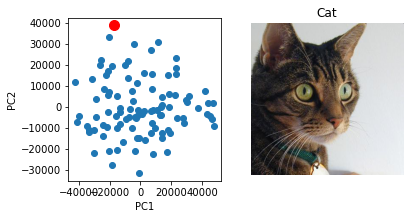

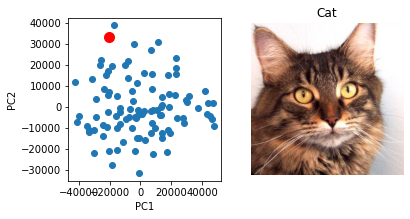

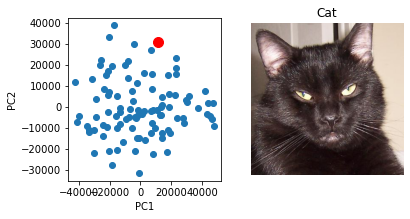

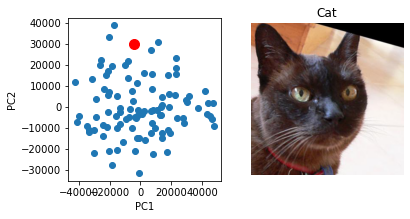

In [21]:
# Check the 4 largest values of PC2
max_pc2s = nargmax(pc_2, 4)
for i in max_pc2s:
    plot_pca_space_and_img(i)

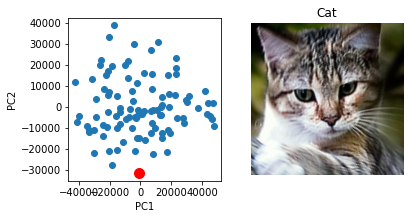

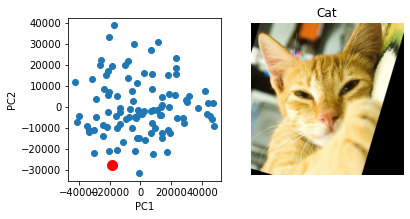

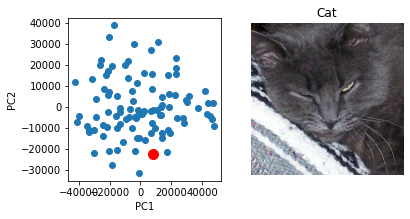

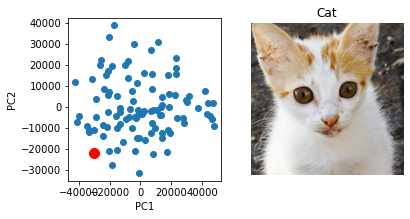

In [22]:
# Check the 4 smallest values of PC2
min_pc2s = nargmin(pc_2, 4)
for i in min_pc2s:
    plot_pca_space_and_img(i)


**Exercise 18:** *How do these extreme cat photo look like? Are some actually of such bad quality that they should be removed from the training set? If you remove images from the training set, then you should run the PCA again. Do this until you are satisfied with the quality of the training data.*


In [23]:
filtered_matrix = data_matrix.copy()

# Remove the 8 largest values of PC1, 5 smallest values of PC1,
# 5 largest values of PC2 and 5 smallest values of PC2
max_pc1s = nargmax(pc_1, 8)
min_pc1s = nargmin(pc_1, 5)
max_pc2s = nargmax(pc_2, 5)
min_pc2s = nargmin(pc_2, 5)

remove_idx = np.concatenate((max_pc1s, min_pc1s, max_pc2s, min_pc2s))
filtered_matrix = np.delete(filtered_matrix, remove_idx, axis=0)

# Recompute PCA
cats_pca = PCA(n_components=50)
cats_pca.fit(filtered_matrix)
components = cats_pca.transform(filtered_matrix)

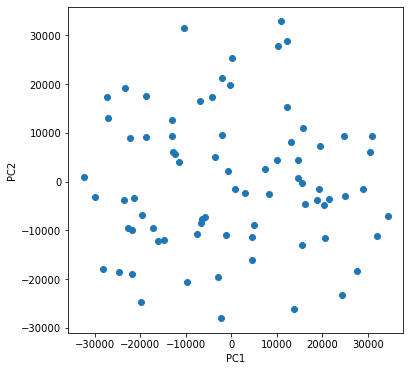

In [24]:
pc_1 = components[:, 0] 
pc_2 = components[:, 1]
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(pc_1, pc_2, "o")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

### The first synthesized cat
**Exercise 19:** *Create your first fake cat using the average image and the first principal component. You should choose experiment with different weight values (w)* :

In [25]:
print("Maximal value of PC1: {:.8f}".format(np.max(cats_pca.components_[0, :])))
print("Minimal value of PC1: {:.8f}".format(np.min(cats_pca.components_[0, :])))

Maximal value of PC1: 0.00043260
Minimal value of PC1: -0.00298375


In [26]:
w = 60000
synth_cat = average_cat + w * cats_pca.components_[0, :]

**Exercise 20:** *Use `create_u_byte_image_from_vector` visualize your fake cat.*

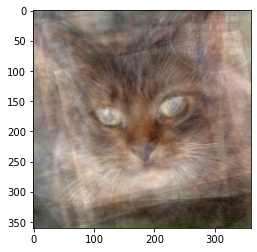

In [27]:
synth_cat_img = create_u_byte_image_from_vector(synth_cat, height, width, channels)
plt.imshow(synth_cat_img)
plt.show()

**Exercise 21:** *Synthesize some cats, where you use both the first and second principal components and select their individual weights based on the PCA plot.*

In [28]:
print("Maximal value of PC2: {:.8f}".format(np.max(cats_pca.components_[1, :])))
print("Minimal value of PC2: {:.8f}".format(np.min(cats_pca.components_[1, :])))

Maximal value of PC2: 0.00431842
Minimal value of PC2: -0.00311438


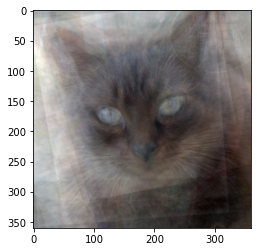

In [29]:
w0, w1 = 60000, 60000
synth_cat = average_cat + w0 * cats_pca.components_[0, :] + w1 * cats_pca.components_[1, :]
synth_cat_img = create_u_byte_image_from_vector(synth_cat, height, width, channels)
plt.imshow(synth_cat_img)
plt.show()

### The major cat variation in the data set


**Exercise 22:** *Synthesize and visualize cats that demonstrate the first three major modes of variation. Try show the average cat in the middle of a plot, with the negative sample to the left and the positive to the right. Can you recognise some visual patterns in these modes of variation?*

In [30]:
def visualize_mode_of_variation(m):
    synth_cat_plus = average_cat + 3 * np.sqrt(cats_pca.explained_variance_[m]) * cats_pca.components_[m, :]
    synth_cat_minus = average_cat - 3 * np.sqrt(cats_pca.explained_variance_[m]) * cats_pca.components_[m, :]
    
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].imshow(create_u_byte_image_from_vector(synth_cat_minus, height, width, channels))
    ax[0].set_title("Cat - 3$\sigma$")
    ax[1].imshow(create_u_byte_image_from_vector(average_cat, height, width, channels))
    ax[1].set_title("Average cat")
    ax[2].imshow(create_u_byte_image_from_vector(synth_cat_plus, height, width, channels))
    ax[2].set_title("Cat + 3$\sigma$")
    fig.suptitle("Mode of variation PC{}".format(m + 1))

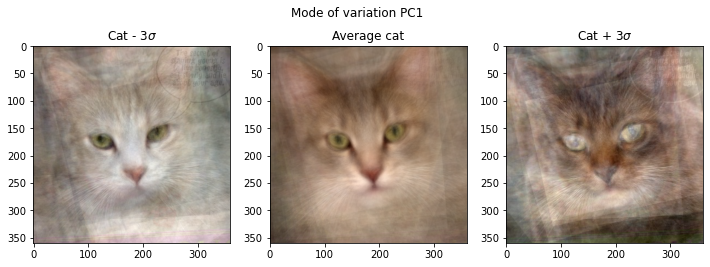

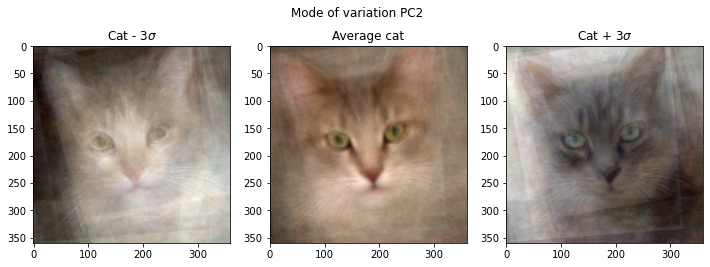

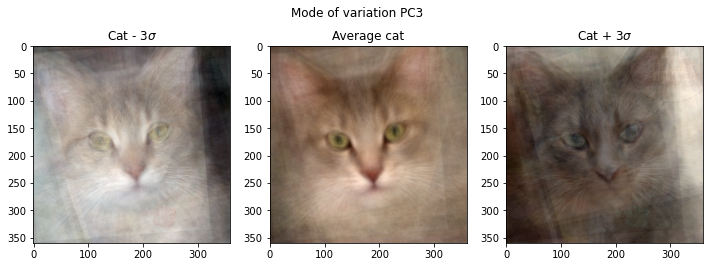

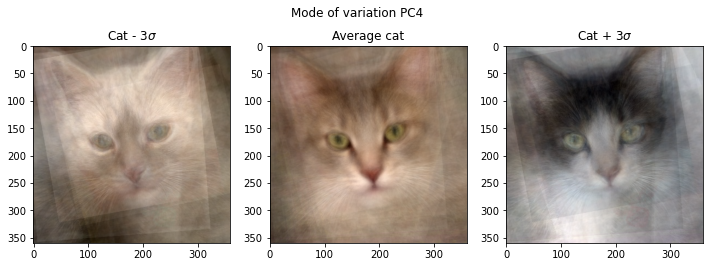

In [31]:
visualize_mode_of_variation(m = 0)
visualize_mode_of_variation(m = 1)
visualize_mode_of_variation(m = 2)
visualize_mode_of_variation(m = 3)

### The Cat Synthesizer (EigenCats)
**Exercise 23:** *Generate as many cat photos as your heart desires.*.


In [32]:
def random_cat_generator():
    w = np.random.randn(50)*50000
    w = w*np.exp(-np.arange(50)) # Decrease the influence of the higher PCs
    synth_cat = average_cat + np.dot(w, cats_pca.components_)
    return create_u_byte_image_from_vector(synth_cat, height, width, channels)

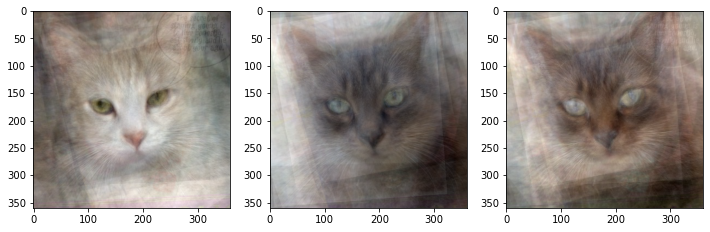

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(random_cat_generator())
ax[1].imshow(random_cat_generator())
ax[2].imshow(random_cat_generator())
plt.show()

## Cat identification in PCA space


**Exercise 24:** *Start by finding the PCA space coordinates of your missing cat:*


In [34]:
im_miss = io.imread("data/MissingCatProcessed.jpg")
im_miss_flat = im_miss.flatten()
im_miss_flat = im_miss_flat.reshape(1, -1)
pca_coords = cats_pca.transform(im_miss_flat)
pca_coords = pca_coords.flatten()

**Exercise 25:** *Plot all the cats in PCA space using the first two dimensions. Plot your missing cat in the same plot, with another color and marker. Is it placed somewhere sensible and does it have close neighbours?*

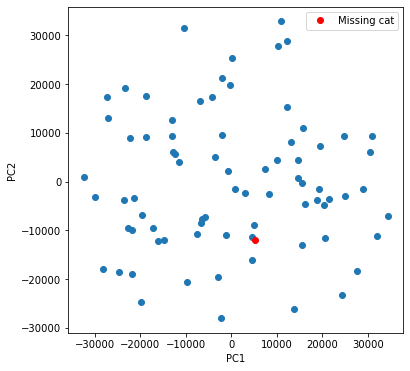

In [35]:
components = cats_pca.transform(filtered_matrix)
pc_1 = components[:, 0] 
pc_2 = components[:, 1]
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(pc_1, pc_2, "o")
ax.plot(pca_coords[0], pca_coords[1], "ro", label="Missing cat")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.legend()
plt.show()

**Exercise 26:** *Generate synthetic versions of your cat, where you change the n_components_to_use from 1 to for example 50.*

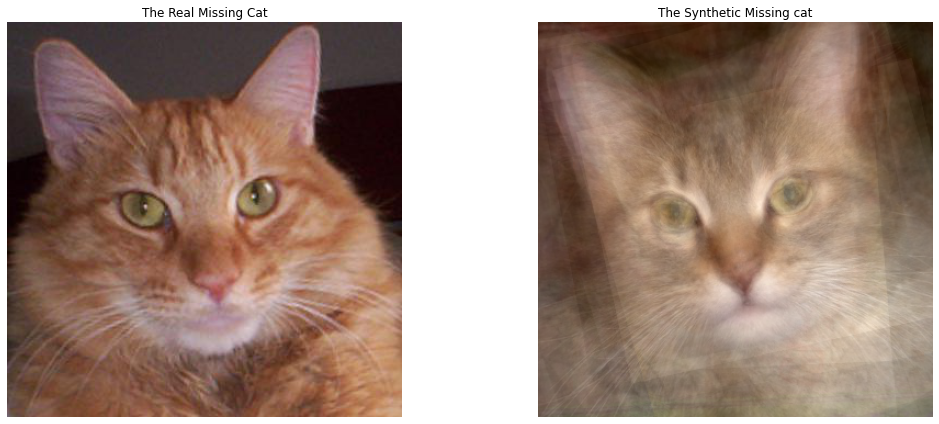

In [36]:
n_components_to_use = 10
synth_cat = average_cat
for idx in range(n_components_to_use):
	synth_cat = synth_cat + pca_coords[idx] * cats_pca.components_[idx, :]

fig, ax = plt.subplots(ncols=2, figsize=(16, 6))
ax[0].imshow(im_miss)
ax[0].set_title('The Real Missing Cat')
ax[1].imshow(create_u_byte_image_from_vector(synth_cat, height, width, channels))
ax[1].set_title('The Synthetic Missing cat')
for a in ax:
	a.axis('off')
plt.tight_layout()
plt.show()

**Exercise 27:** *Find the id of the cat that has the smallest and largest distance in PCA space to your missing cat. Visualize these cats. Are they as you expected? Do you think your friends and family will notice a difference?*

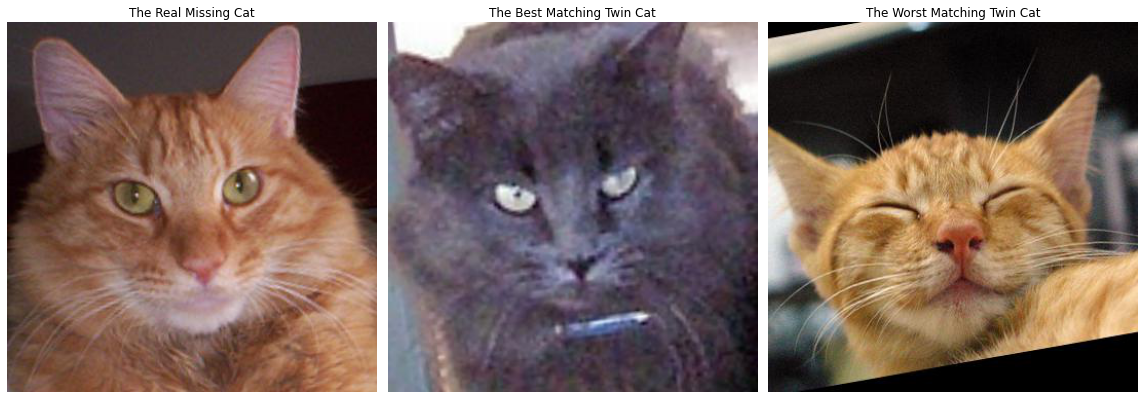

In [37]:
comp_sub = components - pca_coords
pca_distances = np.linalg.norm(comp_sub, axis=1)

best_match = np.argmin(pca_distances)
best_twin_cat = data_matrix[best_match, :]
worst_match = np.argmax(pca_distances)
worst_twin_cat = data_matrix[worst_match, :]
fig, ax = plt.subplots(ncols=3, figsize=(16, 6))
ax[0].imshow(im_miss)
ax[0].set_title('The Real Missing Cat')
ax[1].imshow(create_u_byte_image_from_vector(best_twin_cat, height, width, channels))
ax[1].set_title('The Best Matching Twin Cat')
ax[2].imshow(create_u_byte_image_from_vector(worst_twin_cat, height, width, channels))
ax[2].set_title('The Worst Matching Twin Cat')
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()


**Exercise 28:** *Find the ids of and visualize the 5 closest cats in PCA space. Do they look like your cat?*



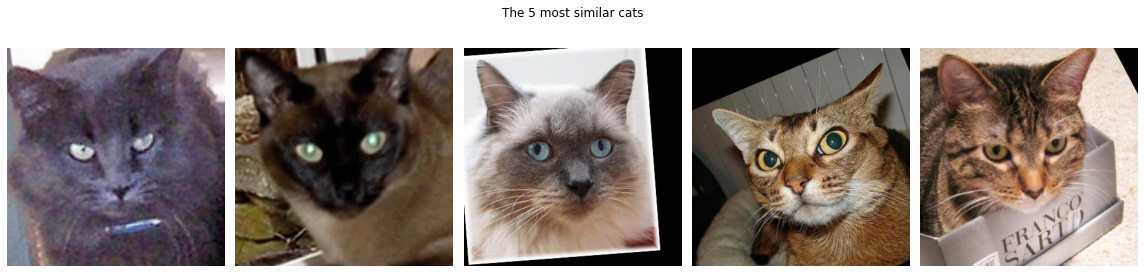

In [38]:
n_best = 5
best = np.argpartition(pca_distances, n_best)
fig, ax = plt.subplots(ncols=n_best, figsize=(16, 4))
for i in range(n_best):
    candidate_twin_cat = data_matrix[best[i], :]
    ax[i].imshow(create_u_byte_image_from_vector(candidate_twin_cat, height, width, channels))
    ax[i].axis('off')

fig.suptitle(f"The {n_best} most similar cats")
plt.tight_layout()
plt.show()
